Intentemos primeramente cargar los datos y ver qué forma tienen los pulsos

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import re
import os
import csv

Algunas funciones para reutilizar código

In [3]:
def sub_arr(arr):
    """
    Retorna una sub-array de 'arr' que contiene todos los elementos no negativos (pulso) 
    que se extienden hacia afuera desde el índice 8 hasta que se encuentran elementos negativos en ambos extremos.
    
    Parámetros:
    arr (list): Una lista de números enteros (evento).
    
    Retorna:
    list: Una sub-array de 'arr' con números enteros no negativos (pulso).
    """
    start, end = 8, 8
    while start >= 0 and arr[start] > 0:
        start -= 1
    while end < len(arr) and arr[end] > 0:
        end += 1
    if start == -1 and end == len(arr):
        return []
    if arr[start] < 0:
        start += 1
    if arr[end - 1] < 0:
        end -= 1
    return arr[start:end]

In [4]:
def subsegments(new_data):
    """
    Genera subsegmentos de datos a partir de segmentos proporcionados.

    Parámetros:
    new_data (list): Una lista de listas de números enteros (segmentos de datos).

    Retorna:
    list: Una lista de subsegmentos de datos.
    """
    return [sub_arr(segment) for segment in new_data if len(sub_arr(segment)) > 0]

In [5]:
def load_data(file_list):
    """
    Carga datos de una lista de archivos, calcula los máximos, las sumas y los pulsos promedio.

    Parámetros:
    file_list (list): Una lista de rutas de archivos a cargar.

    Retorna:
    tuple: Tres listas, una con los máximos, otra con las sumas y otra con los pulsos promedio para cada archivo.
    """
    all_max_per_file, all_sum_per_file, mean_pulses = [], [], []
    for file in file_list:
        data = np.loadtxt(file, np.int32, usecols=0)
        print(f'Longitud de {file}: {len(data)}')
        num_segments = len(data) // 32
        new_data = data[:num_segments * 32].reshape(-1, 32)
        mean_pulses.append(np.mean(new_data, axis=0))
        subsegment_data = subsegments(new_data)
        if subsegment_data:
            max_values = [np.max(subsegment) for subsegment in subsegment_data]
            all_max_per_file.append(max_values)
            sum_values = [np.sum(subsegment) for subsegment in subsegment_data]
            all_sum_per_file.append(sum_values)
    return all_max_per_file, all_sum_per_file, mean_pulses

In [6]:
def plot_histogram(data, bin_width, labels, title, x_label, y_label, log_scale=False, xlim=None):
    """
    Genera y muestra un histograma a partir de los datos proporcionados.

    Parámetros:
    data (list): Lista de listas con los datos a graficar.
    bin_width (int): Ancho del bin para el histograma.
    labels (list): Lista de etiquetas para las diferentes series de datos.
    title (str): Título del gráfico.
    x_label (str): Etiqueta del eje x.
    y_label (str): Etiqueta del eje y.
    log_scale (bool): Si True, el eje y estará en escala logarítmica.
    xlim (tuple): Limites en el eje x.
    """
    for d, label in zip(data, labels):
        plt.hist(
            d,
            bins=np.arange(np.min(d), np.max(d), bin_width),
            histtype='step',
            label=label,
            linewidth=1.5
        )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if log_scale:
        plt.yscale('log')
    if xlim:
        plt.xlim(xlim)
    plt.grid(True)
    plt.show()

In [7]:
def save_filtered_data(file_list, charge_range, output_dir):
    """
    Filtra y guarda los datos que se encuentran dentro del rango de carga especificado.

    Parámetros:
    file_list (list): Lista de archivos a procesar.
    charge_range (tuple): Rango de carga (min, max) para filtrar los datos.
    output_dir (str): Directorio donde se guardarán los archivos filtrados.
    """
    fuente_data, fondo_data = [], []
    fuente_file, fondo_file = file_list
    for file, data_list in zip([fuente_file, fondo_file], [fuente_data, fondo_data]):
        data = np.loadtxt(file, np.int32, usecols=0)
        num_segments = len(data) // 32
        segments = data[:num_segments * 32].reshape(-1, 32)
        subsegment_data = subsegments(segments)
        if subsegment_data:
            for index, subsegment in enumerate(subsegment_data):
                if charge_range[0] < np.sum(subsegment) < charge_range[1]:
                    data_list.append(segments[index])
    os.makedirs(output_dir, exist_ok=True)
    if fuente_data:
        np.savetxt(os.path.join(output_dir, "fuente_pulsos.csv"), np.array(fuente_data), delimiter=',', fmt='%d')
    if fondo_data:
        np.savetxt(os.path.join(output_dir, "fondo_pulsos.csv"), np.array(fondo_data), delimiter=',', fmt='%d')
    print(f"Datos guardados en {output_dir}")

Reemplazar en caso que la dirección de los archivos sea otra. Estos archivos no se van a subir directamente al repositorio porque son muy pesados, no son necesarios para el análisis de los modelos utilizados, pero si igualmente quieres obtenerlos sigue los pasos del README

In [3]:
file_list_AmBe = sorted(glob.glob('AmBe/'))

AmBe desnuda (neutrones + gamma)

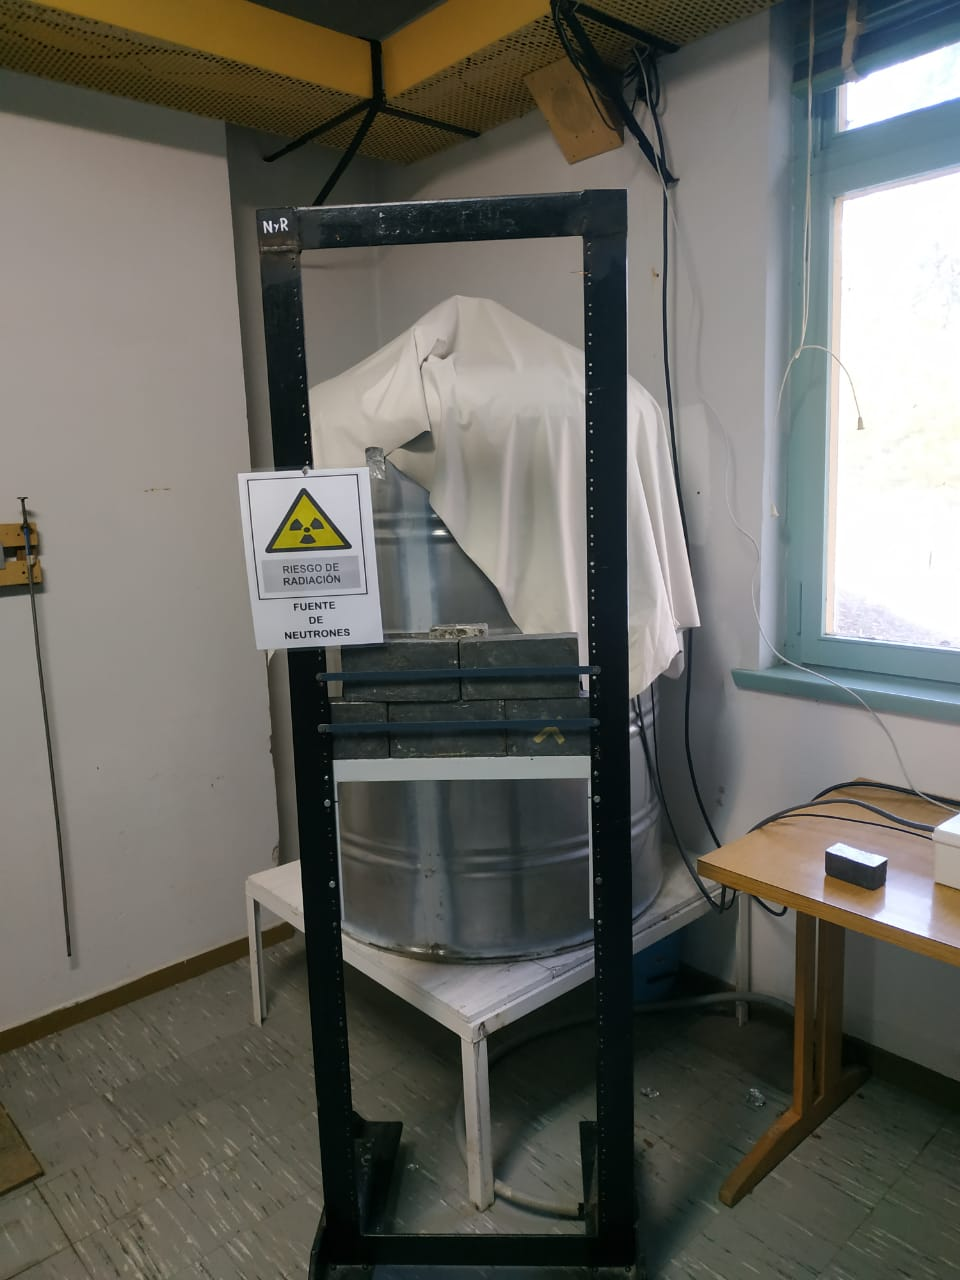

In [8]:
from IPython.display import Image

image_path = 'imgs/desnuda.jpg'

display(Image(filename=image_path, width=300, height=300))

In [8]:
file_list_AmBe_desnuda = sorted(glob.glob('AmBe/*desnuda*'))
file_list_AmBe_plomo = sorted(glob.glob('AmBe/*plomo_30cm*'))
file_list_AmBe_cdparafinab = sorted(glob.glob('AmBe/*cadmioparafinaborada*'))
file_list_AmBe_parafinapuraplomo2bloques = sorted(glob.glob('AmBe/*parafinapuraplomo2bloques*'))

In [9]:
all_max_per_file_AmBe_desnuda, all_sum_per_file_AmBe_desnuda, mean_pulses_AmBe_desnuda = load_data(file_list_AmBe_desnuda)

Longitud de AmBe/ambe_desnuda_30cm_880t1_nogps_1970_01_01_00h00.dat: 99038176
Longitud de AmBe/fondo_ambe_desnuda_30cm_880t1_nogps_1970_01_01_00h00.dat: 4382656


Veamos todo el rango energético

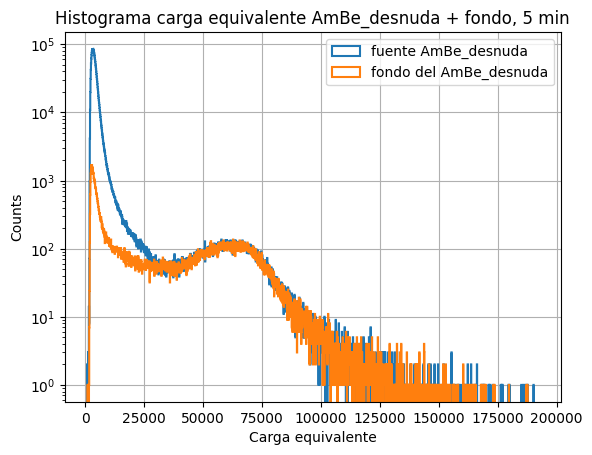

In [10]:
plot_histogram(
    all_sum_per_file_AmBe_desnuda, 
    bin_width=100, 
    labels=['fuente AmBe_desnuda', 'fondo del AmBe_desnuda'], 
    title='Histograma carga equivalente AmBe_desnuda + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True
)

Hagamos zoom donde actúa la fuente

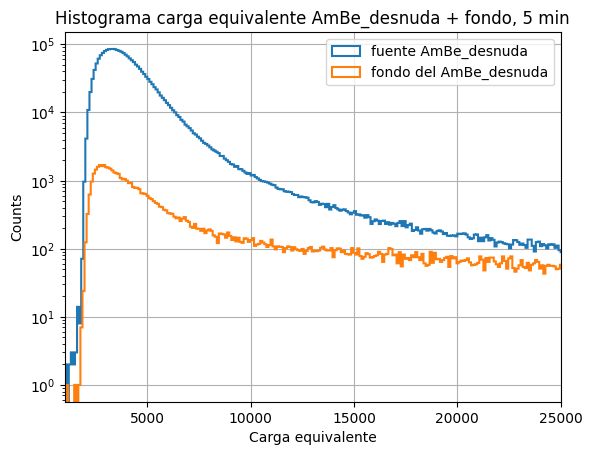

In [11]:
plot_histogram(
    all_sum_per_file_AmBe_desnuda, 
    bin_width=100, 
    labels=['fuente AmBe_desnuda', 'fondo del AmBe_desnuda'], 
    title='Histograma carga equivalente AmBe_desnuda + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True,
    xlim=(1000, 25000)
)

Guardamos un pedazo del espectro, de 4000 - 6000 parece bien

In [12]:
charge_thresholds_AmBe = (4000, 6000)  # Ajustar estos valores después de inspeccionar los histogramas
save_filtered_data(file_list_AmBe_desnuda, charge_thresholds_AmBe, "AmBe_desnuda_filtered")

Datos guardados en AmBe_desnuda_filtered


In [24]:
AmBe_desnuda_filtered = np.loadtxt( 'AmBe_desnuda_filtered/fuente_pulsos.csv', delimiter=',')
fondo_AmBe_desnuda_filtered = np.loadtxt( 'AmBe_desnuda_filtered/fondo_pulsos.csv', delimiter=',')

Y el pulso medio

In [25]:
mean_pulse_AmBe_desnuda_filtered = np.mean(AmBe_desnuda_filtered, axis=0)
mean_pulse_fondo_AmBe_desnuda_filtered = np.mean(fondo_AmBe_desnuda_filtered, axis=0)

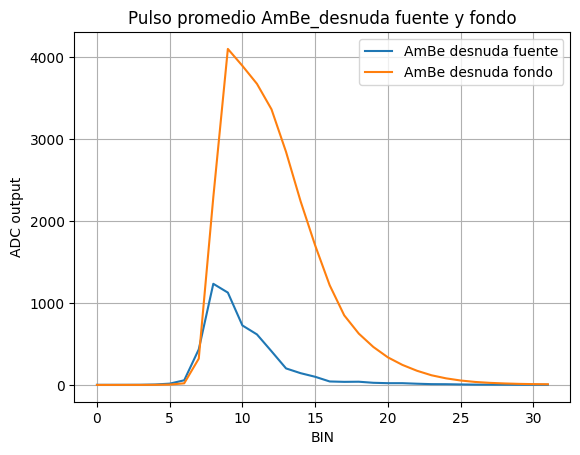

In [15]:
plt.plot(mean_pulse_AmBe_desnuda_filtered, label='AmBe desnuda fuente')
plt.plot(mean_pulse_fondo_AmBe_desnuda_filtered, label='AmBe desnuda fondo')
plt.title('Pulso promedio AmBe_desnuda fuente y fondo')
plt.xlabel('BIN')
plt.ylabel('ADC output')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
del all_max_per_file_AmBe_desnuda
del all_sum_per_file_AmBe_desnuda

Ahora con plomo

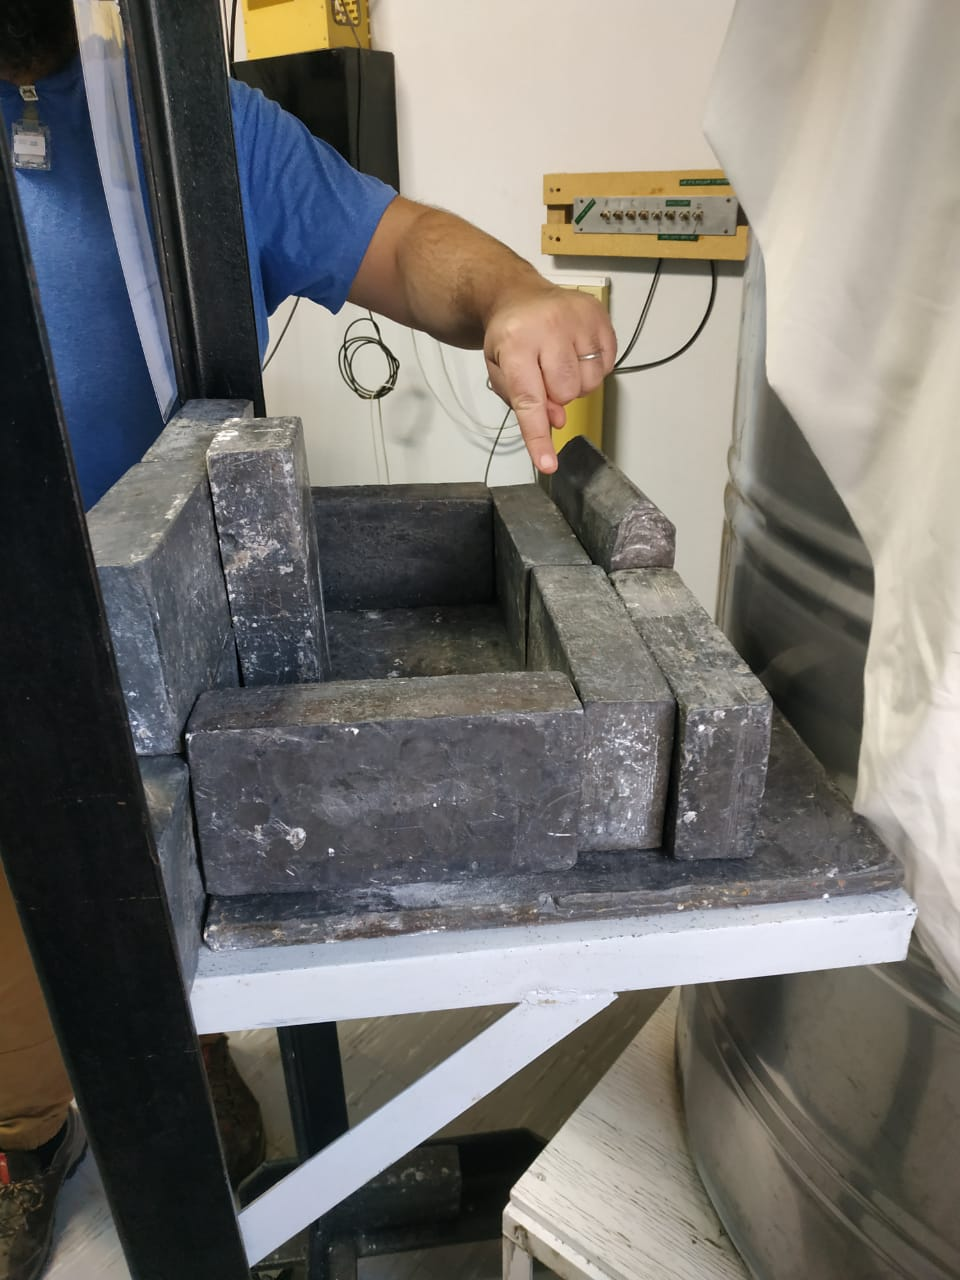

In [9]:
from IPython.display import Image

image_path = 'imgs/plomo.jpg'

display(Image(filename=image_path, width=300, height=300))

In [16]:
all_max_per_file_AmBe_plomo, all_sum_per_file_AmBe_plomo, mean_pulses_AmBe_plomo = load_data(file_list_AmBe_plomo)

Longitud de AmBe/ambe_plomo_30cm_880t1_nogps_1970_01_01_01h00.dat: 24154392
Longitud de AmBe/fondo_ambe_parafinaboradaplomo_30cm_nogps_1970_01_01_01h00.dat: 4434268


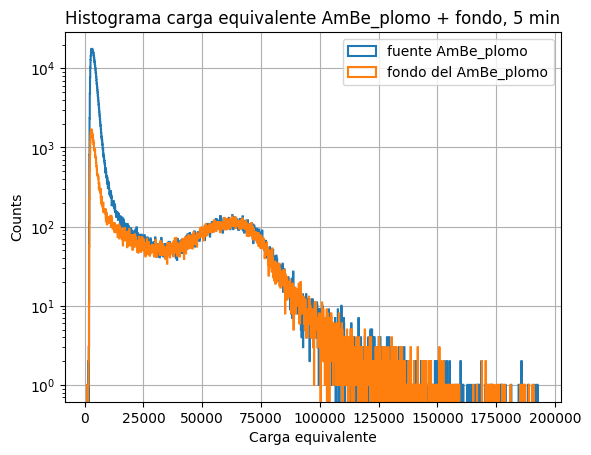

In [18]:
plot_histogram(
    all_sum_per_file_AmBe_plomo, 
    bin_width=100, 
    labels=['fuente AmBe_plomo', 'fondo del AmBe_plomo'], 
    title='Histograma carga equivalente AmBe_plomo + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True
)

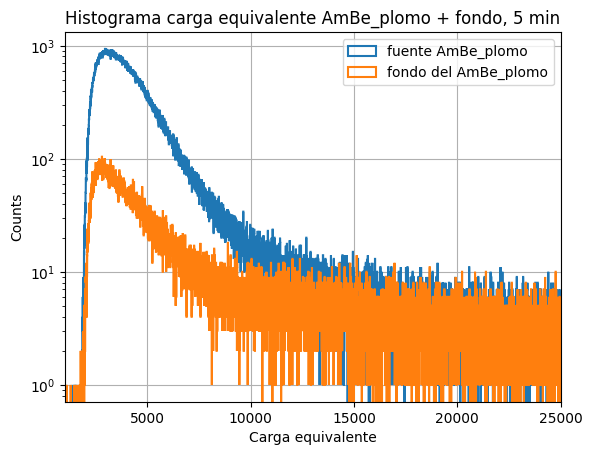

In [19]:
plot_histogram(
    all_sum_per_file_AmBe_plomo, 
    bin_width=5, 
    labels=['fuente AmBe_plomo', 'fondo del AmBe_plomo'], 
    title='Histograma carga equivalente AmBe_plomo + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True, 
    xlim=(1000, 25000)
)

In [20]:
charge_thresholds_AmBe = (4000, 6000)  # Ajustar estos valores después de inspeccionar los histogramas
save_filtered_data(file_list_AmBe_plomo, charge_thresholds_AmBe, "AmBe_plomo_filtered")

Datos guardados en AmBe_plomo_filtered


In [21]:
AmBe_plomo_filtered = np.loadtxt( 'AmBe_plomo_filtered/fuente_pulsos.csv', delimiter=',')
fondo_AmBe_plomo_filtered = np.loadtxt( 'AmBe_plomo_filtered/fondo_pulsos.csv', delimiter=',')

In [33]:
mean_pulse_AmBe_plomo_filtered = np.mean(AmBe_plomo_filtered, axis=0)
mean_pulse_fondo_AmBe_plomo_filtered = np.mean(fondo_AmBe_plomo_filtered, axis=0)

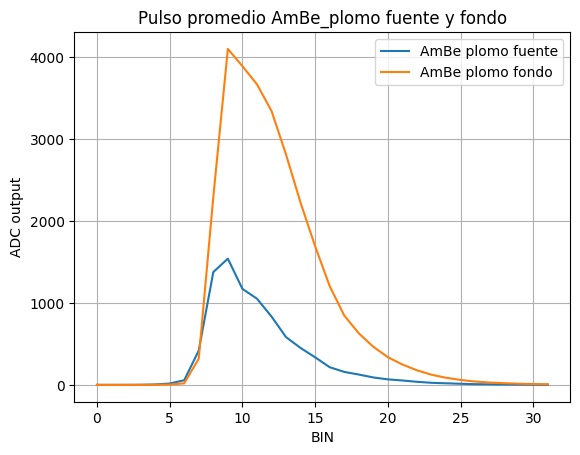

In [34]:
plt.plot(mean_pulse_AmBe_plomo_filtered, label='AmBe plomo fuente')
plt.plot(mean_pulse_fondo_AmBe_plomo_filtered, label='AmBe plomo fondo')
plt.title('Pulso promedio AmBe_plomo fuente y fondo')
plt.xlabel('BIN')
plt.ylabel('ADC output')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
del all_max_per_file_AmBe_plomo
del all_sum_per_file_AmBe_plomo

Cadmio parafina borada

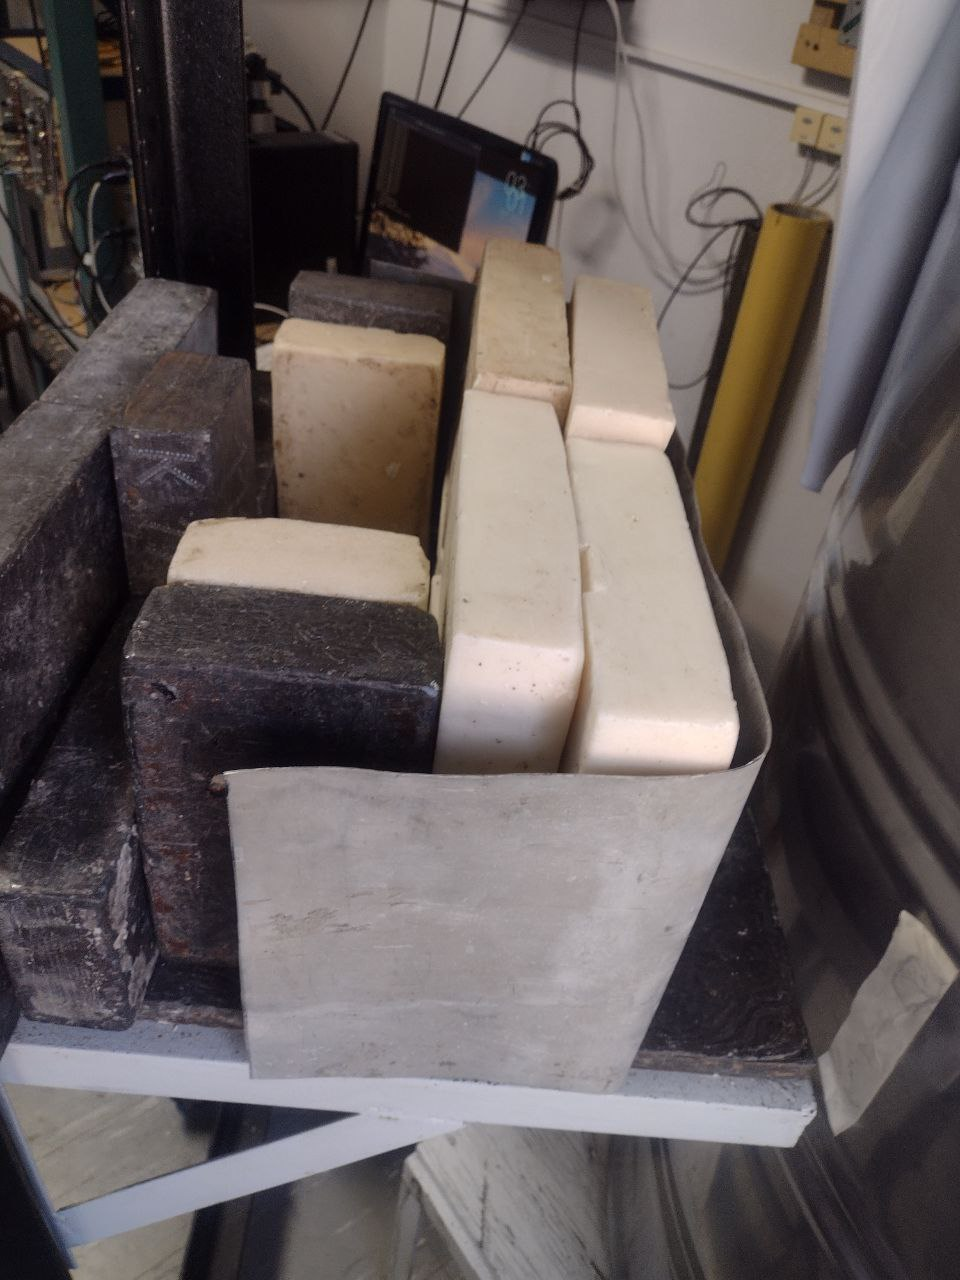

In [10]:
from IPython.display import Image

image_path = 'imgs/cdpb.jpg'

display(Image(filename=image_path, width=300, height=300))

In [28]:
all_max_per_file_AmBe_cdparafinab, all_sum_per_file_AmBe_cdparafinab, mean_pulses_AmBe_cdparafinab = load_data(file_list_AmBe_cdparafinab)

Longitud de AmBe/ambe_cadmioparafinaborada_30cm_880t1_nogps_1970_01_01_02h00.dat: 66370304
Longitud de AmBe/fondo_ambe_cadmioparafinaborada_30cm_880t1_nogps_1970_01_01_02h00.dat: 4368412


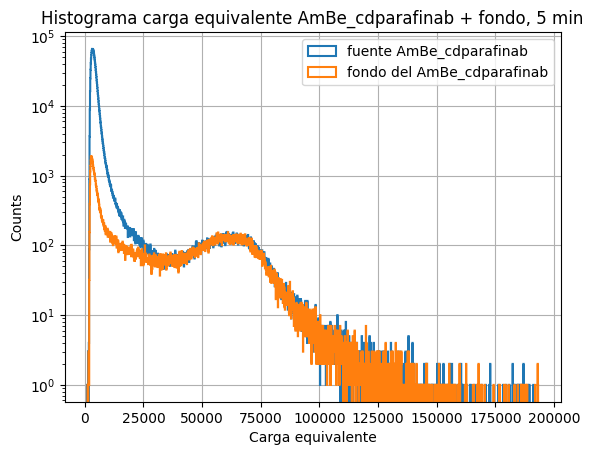

In [29]:
plot_histogram(
    all_sum_per_file_AmBe_cdparafinab, 
    bin_width=100, 
    labels=['fuente AmBe_cdparafinab', 'fondo del AmBe_cdparafinab'], 
    title='Histograma carga equivalente AmBe_cdparafinab + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True
)

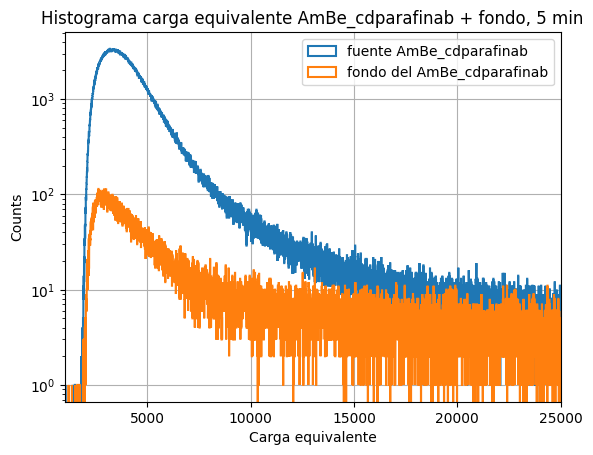

In [30]:
plot_histogram(
    all_sum_per_file_AmBe_cdparafinab, 
    bin_width=5, 
    labels=['fuente AmBe_cdparafinab', 'fondo del AmBe_cdparafinab'], 
    title='Histograma carga equivalente AmBe_cdparafinab + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True, 
    xlim=(1000, 25000)
)

In [31]:
charge_thresholds_AmBe = (4000, 6000)  # Ajustar estos valores después de inspeccionar los histogramas
save_filtered_data(file_list_AmBe_cdparafinab, charge_thresholds_AmBe, "AmBe_cdparafinab_filtered")

Datos guardados en AmBe_cdparafinab_filtered


In [26]:
AmBe_cdparafinab_filtered = np.loadtxt( 'AmBe_cdparafinab_filtered/fuente_pulsos.csv', delimiter=',')
fondo_AmBe_cdparafinab_filtered = np.loadtxt( 'AmBe_cdparafinab_filtered/fondo_pulsos.csv', delimiter=',')

In [27]:
mean_pulse_AmBe_cdparafinab_filtered = np.mean(AmBe_cdparafinab_filtered, axis=0)
mean_pulse_fondo_AmBe_cdparafinab_filtered = np.mean(fondo_AmBe_cdparafinab_filtered, axis=0)

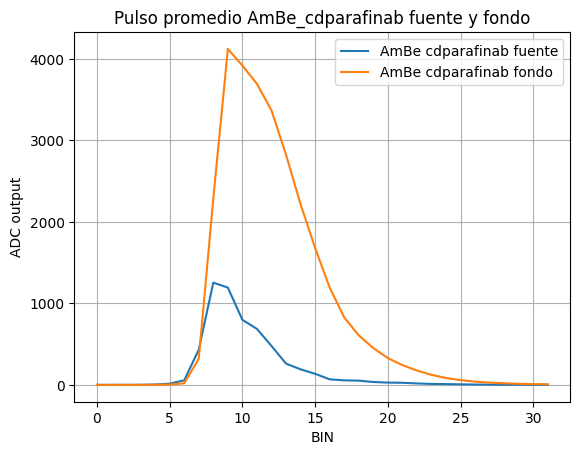

In [36]:
plt.plot(mean_pulse_AmBe_cdparafinab_filtered, label='AmBe cdparafinab fuente')
plt.plot(mean_pulse_fondo_AmBe_cdparafinab_filtered, label='AmBe cdparafinab fondo')
plt.title('Pulso promedio AmBe_cdparafinab fuente y fondo')
plt.xlabel('BIN')
plt.ylabel('ADC output')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
del all_max_per_file_AmBe_cdparafinab
del all_sum_per_file_AmBe_cdparafinab

Parafina pura plomo

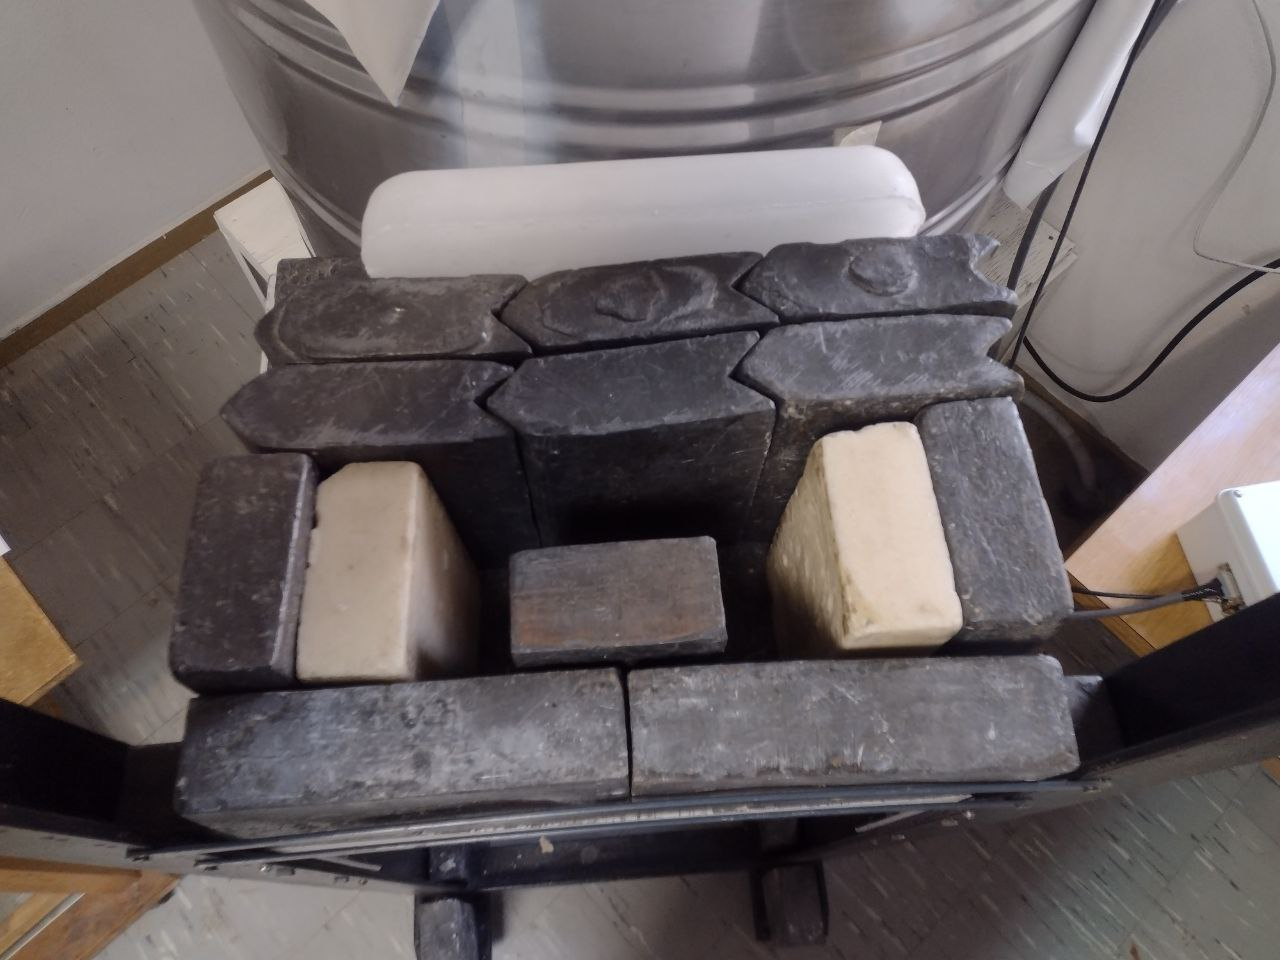

In [11]:
from IPython.display import Image

image_path = 'imgs/ppura.jpg'

display(Image(filename=image_path, width=300, height=300))

In [9]:
all_max_per_file_AmBe_pp2bloques, all_sum_per_file_AmBe_pp2bloques, mean_pulses_AmBe_pp2bloques = load_data(file_list_AmBe_parafinapuraplomo2bloques)

Longitud de AmBe/ambe_parafinapuraplomo2bloques_30cm_880t1_nogps_1970_01_01_01h00.dat: 21922452
Longitud de AmBe/fondo_ambe_parafinapuraplomo2bloques_30cm_880t1_nogps_1970_01_01_01h00.dat: 4397600


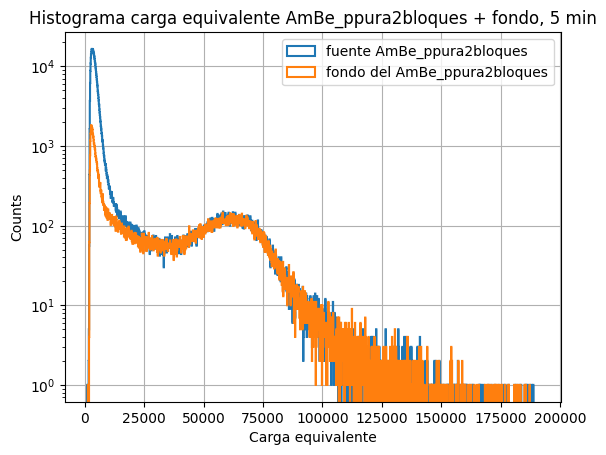

In [10]:
plot_histogram(
    all_sum_per_file_AmBe_pp2bloques, 
    bin_width=100, 
    labels=['fuente AmBe_ppura2bloques', 'fondo del AmBe_ppura2bloques'], 
    title='Histograma carga equivalente AmBe_ppura2bloques + fondo, 5 min', 
    x_label='Carga equivalente', 
    y_label='Counts', 
    log_scale=True
)

In [12]:
charge_thresholds_AmBe = (4000, 6000)
save_filtered_data(file_list_AmBe_parafinapuraplomo2bloques, charge_thresholds_AmBe, "AmBe_ppura2bloques_filtered")

Datos guardados en AmBe_ppura2bloques_filtered


In [13]:
AmBe_plomo_filtered = np.loadtxt( 'AmBe_plomo_filtered/fuente_pulsos.csv', delimiter=',')
AmBe_pp2bloques_filtered = np.loadtxt( 'AmBe_ppura2bloques_filtered/fuente_pulsos.csv', delimiter=',')

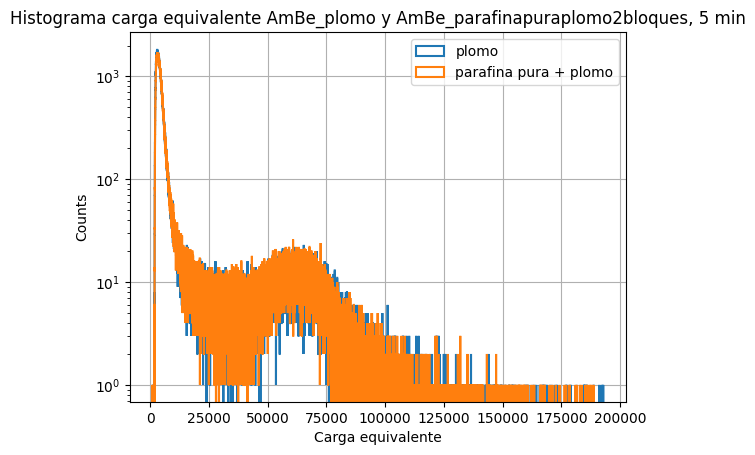

In [22]:
plt.hist(all_sum_per_file_AmBe_plomo[0], bins=np.arange(np.min(all_sum_per_file_AmBe_plomo[0]), np.max(all_sum_per_file_AmBe_plomo[0]), 10), histtype='step', label='plomo',linewidth=1.5)
plt.hist(all_sum_per_file_AmBe_pp2bloques[0], bins=np.arange(np.min(all_sum_per_file_AmBe_pp2bloques[0]), np.max(all_sum_per_file_AmBe_pp2bloques[0]), 10), histtype='step', label='parafina pura + plomo',linewidth=1.5)
plt.xlabel('Carga equivalente')
plt.ylabel('Counts')
plt.title('Histograma carga equivalente AmBe_plomo y AmBe_parafinapuraplomo2bloques, 5 min')
plt.legend()
plt.yscale('log')
# plt.xlim(4000,)
plt.grid(True)
plt.show()

In [30]:
mean_pulse_AmBe_plomo_filtered = np.mean(AmBe_plomo_filtered, axis=0)
mean_pulse_AmBe_pp2bloques_filtered = np.mean(AmBe_pp2bloques_filtered, axis=0)

Veamos una comparación entre los 4 tipos de pulsos

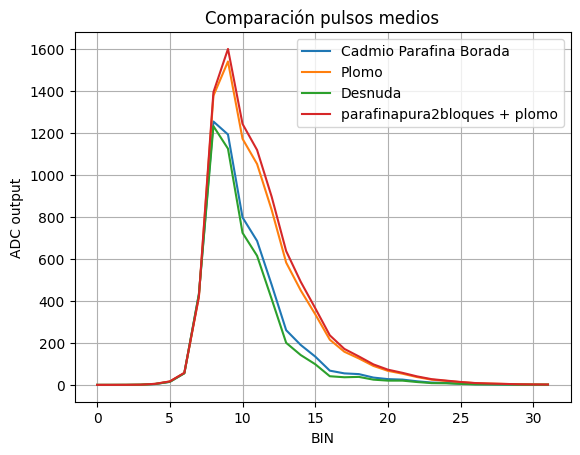

In [31]:
plt.plot(mean_pulse_AmBe_cdparafinab_filtered, label = 'Cadmio Parafina Borada')
plt.plot(mean_pulse_AmBe_plomo_filtered, label = 'Plomo')
plt.plot(mean_pulse_AmBe_desnuda_filtered, label = 'Desnuda')
plt.plot(mean_pulse_AmBe_pp2bloques_filtered, label = 'parafinapura2bloques + plomo')
plt.title('Comparación pulsos medios')
plt.xlabel('BIN')
plt.legend()
plt.grid()
plt.ylabel('ADC output')
plt.show()

#### Clasificador basado en stacking

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def cargar_datos(neutrones_file, gamma_file):
    """
    Carga los datos de neutrones y gamma desde los archivos proporcionados y crea las etiquetas correspondientes.

    Args:
        neutrones_file (str): Ruta del archivo que contiene los datos de neutrones.
        gamma_file (str): Ruta del archivo que contiene los datos de gamma y neutrones.

    Returns:
        tuple: Una tupla que contiene los datos combinados y las etiquetas correspondientes.
            - data (ndarray): Un array numpy que contiene los datos combinados de neutrones y gamma.
            - labels (ndarray): Un array numpy que contiene las etiquetas correspondientes a los datos.
                1 representa neutrones y 0 representa gamma en gamma_neutrones_pulsos.
    """
    neutrones_pulsos = np.loadtxt(neutrones_file, delimiter=',')
    gamma_pulsos = np.loadtxt(gamma_file, delimiter=',')
    
    # Etiquetas: 1 para neutrones y 0 para gamma en gamma_neutrones_pulsos
    labels = np.array([1] * neutrones_pulsos.shape[0] + [0] * gamma_pulsos.shape[0])
    data = np.vstack((neutrones_pulsos, gamma_pulsos))
    return data, labels

neutrones_file = 'AmBe_plomo_filtered/fuente_pulsos.csv'
gamma_file = 'AmBe_cdparafinab_filtered/fuente_pulsos.csv'

data, labels = cargar_datos(neutrones_file, gamma_file)

2024-08-10 09:40:05.633953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-10 09:40:08.011449: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [3]:
# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#### Clasificador basado en stacking

In [4]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier


estimators = [
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [5]:
y_pred_stack = stacking_clf.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.8448650785806069
Confusion Matrix:
 [[107886   3371]
 [ 18602  11779]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91    111257
           1       0.78      0.39      0.52     30381

    accuracy                           0.84    141638
   macro avg       0.82      0.68      0.71    141638
weighted avg       0.84      0.84      0.82    141638



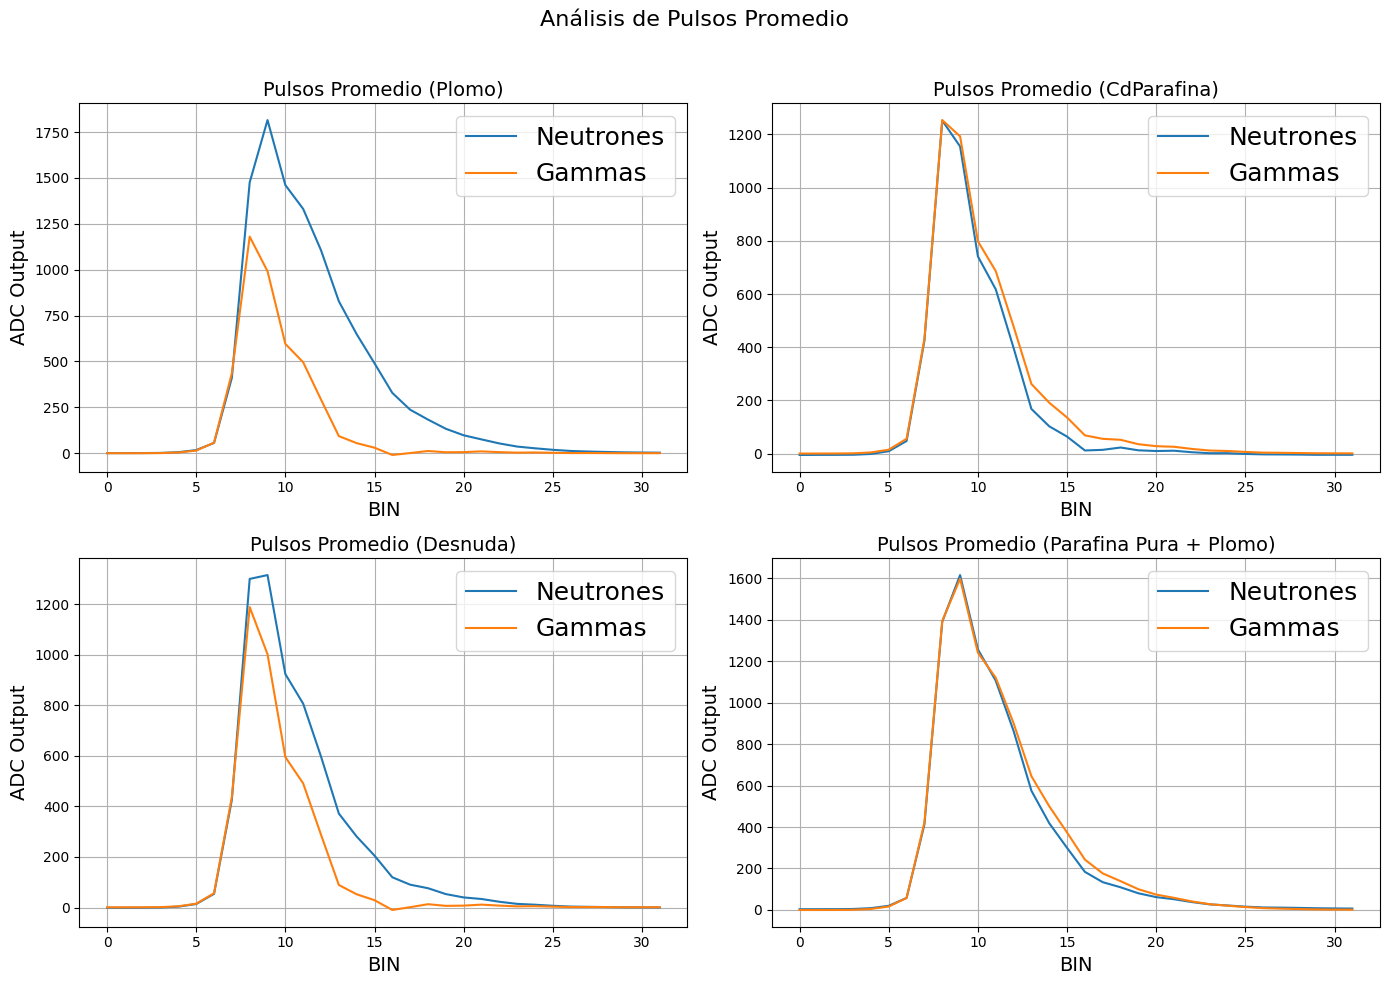

Cantidad de neutrones en plomo: 101369
Cantidad de gammas en plomo: 50844


Cantidad de neutrones en ppura2bloques: 17073
Cantidad de gammas en ppura2bloques: 137337


Cantidad de neutrones en cdparafinab: 5535
Cantidad de gammas en cdparafinab: 550438


Cantidad de neutrones en desnuda: 277947
Cantidad de gammas en desnuda: 428569


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def load_and_predict(file, model, scaler):
    data = np.loadtxt(file, delimiter=',')
    # data_scaled = scaler.transform(data)  # Usar transform en lugar de fit_transform
    y_pred_all = model.predict(data)
    y_pred_all_classes = y_pred_all  # Asumiendo que el modelo devuelve las clases
    # data_descaled = scaler.inverse_transform(data_scaled)
    neutron_pulses = data[y_pred_all_classes == 1]
    gamma_pulses = data[y_pred_all_classes == 0]
    return neutron_pulses, gamma_pulses

def plot_pulse_average(ax, pulse_data, title, label):
    ax.plot(np.mean(pulse_data, axis=0), label=label)
    ax.set_title(title, fontsize = 14)
    ax.set_xlabel('BIN', fontsize = 14)
    ax.set_ylabel('ADC Output', fontsize = 14)
    ax.grid(True)
    ax.legend(fontsize = 18)

scaler = StandardScaler()
best_model = stacking_clf  # Usar el mejor modelo obtenido

desnuda_file = 'AmBe_desnuda_filtered/fuente_pulsos.csv'
ppura2bloques_file = 'AmBe_ppura2bloques_filtered/fuente_pulsos.csv'
cdparafinab_file = 'AmBe_cdparafinab_filtered/fuente_pulsos.csv'

neutron_pulses_desnuda, gamma_pulses_desnuda = load_and_predict(desnuda_file, best_model, scaler)

neutron_pulses_plomo, gamma_pulses_plomo = load_and_predict(neutrones_file, best_model, scaler)

neutron_pulses_cdb, gamma_pulses_cdb = load_and_predict(cdparafinab_file, best_model, scaler)

neutron_pulses_ppura2bloques, gamma_pulses_ppura2bloques = load_and_predict(ppura2bloques_file, best_model, scaler)

# Crear subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Subplots
plot_pulse_average(axes[0, 0], neutron_pulses_plomo, 'Pulsos Promedio (Plomo)', 'Neutrones')
plot_pulse_average(axes[0, 0], gamma_pulses_plomo, 'Pulsos Promedio (Plomo)', 'Gammas')

plot_pulse_average(axes[0, 1], neutron_pulses_cdb, 'Pulsos Promedio (CdParafina)', 'Neutrones')
plot_pulse_average(axes[0, 1], gamma_pulses_cdb, 'Pulsos Promedio (CdParafina)', 'Gammas')

plot_pulse_average(axes[1, 0], neutron_pulses_desnuda, 'Pulsos Promedio (Desnuda)', 'Neutrones')
plot_pulse_average(axes[1, 0], gamma_pulses_desnuda, 'Pulsos Promedio (Desnuda)', 'Gammas')

plot_pulse_average(axes[1, 1], neutron_pulses_ppura2bloques, 'Pulsos Promedio (Parafina Pura + Plomo)', 'Neutrones')
plot_pulse_average(axes[1, 1], gamma_pulses_ppura2bloques, 'Pulsos Promedio (Parafina Pura + Plomo)', 'Gammas')

# Título principal
fig.suptitle('Análisis de Pulsos Promedio', fontsize=16)

# Ajustar el layout para que los subplots no se superpongan
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la gráfica
plt.show()

print(f'Cantidad de neutrones en plomo: {neutron_pulses_plomo.shape[0]}')
print(f'Cantidad de gammas en plomo: {gamma_pulses_plomo.shape[0]}')
print('\n')
print(f'Cantidad de neutrones en ppura2bloques: {neutron_pulses_ppura2bloques.shape[0]}')
print(f'Cantidad de gammas en ppura2bloques: {gamma_pulses_ppura2bloques.shape[0]}')
print('\n')
print(f'Cantidad de neutrones en cdparafinab: {neutron_pulses_cdb.shape[0]}')
print(f'Cantidad de gammas en cdparafinab: {gamma_pulses_cdb.shape[0]}')
print('\n')
print(f'Cantidad de neutrones en desnuda: {neutron_pulses_desnuda.shape[0]}')
print(f'Cantidad de gammas en desnuda: {gamma_pulses_desnuda.shape[0]}')

In [12]:
import joblib
import os

file_name = 'stacking_clf_gb_rf.pkl'

directory = 'models'

if not os.path.exists(directory):
    os.makedirs(directory)

# Ruta completa del archivo
filepath = os.path.join(directory, file_name)

# Guardar el modelo utilizando joblib
joblib.dump(stacking_clf, filepath)

print(f"Modelo guardado exitosamente en '{filepath}'.")

Modelo guardado exitosamente en 'models/stacking_clf_gb_rf.pkl'.


#### Clasificador basado en voting

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importar clasificadores
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Cargar los datos
neutrones_file = 'AmBe_plomo_filtered/fuente_pulsos.csv'
gamma_file = 'AmBe_cdparafinab_filtered/fuente_pulsos.csv'

def cargar_datos(neutrones_file, gamma_file):
    neutrones_pulsos = np.loadtxt(neutrones_file, delimiter=',')
    gamma_pulsos = np.loadtxt(gamma_file, delimiter=',')
    labels = np.array([1] * neutrones_pulsos.shape[0] + [0] * gamma_pulsos.shape[0])
    data = np.vstack((neutrones_pulsos, gamma_pulsos))
    return data, labels

data, labels = cargar_datos(neutrones_file, gamma_file)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [2]:
from sklearn.preprocessing import StandardScaler

# Definir clasificadores
classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')),
]

# Crear el VotingClassifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el VotingClassifier con datos escalados
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)

# Resultados
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/home/said/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:08:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8406712887784351
[[109576   1681]
 [ 20886   9495]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91    111257
           1       0.85      0.31      0.46     30381

    accuracy                           0.84    141638
   macro avg       0.84      0.65      0.68    141638
weighted avg       0.84      0.84      0.81    141638



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def load_and_predict(file, model, scaler):
    data = np.loadtxt(file, delimiter=',')
    # data_scaled = scaler.transform(data)  # Usar transform en lugar de fit_transform
    y_pred_all = model.predict(data)
    y_pred_all_classes = y_pred_all  # Asumiendo que el modelo devuelve las clases
    # data_descaled = scaler.inverse_transform(data_scaled)
    neutron_pulses = data[y_pred_all_classes == 1]
    gamma_pulses = data[y_pred_all_classes == 0]
    return neutron_pulses, gamma_pulses

def plot_pulse_average(ax, pulse_data, title, label):
    ax.plot(np.mean(pulse_data, axis=0), label=label)
    ax.set_title(title, fontsize = 14)
    ax.set_xlabel('BIN', fontsize = 14)
    ax.set_ylabel('ADC Output', fontsize = 14)
    ax.grid(True)
    ax.legend(fontsize = 18)

scaler = StandardScaler()
best_model = voting_clf  # Usar el mejor modelo obtenido

desnuda_file = 'AmBe_desnuda_filtered/fuente_pulsos.csv'
ppura2bloques_file = 'AmBe_ppura2bloques_filtered/fuente_pulsos.csv'
cdparafinab_file = 'AmBe_cdparafinab_filtered/fuente_pulsos.csv'

neutron_pulses_desnuda, gamma_pulses_desnuda = load_and_predict(desnuda_file, best_model, scaler)

neutron_pulses_plomo, gamma_pulses_plomo = load_and_predict(neutrones_file, best_model, scaler)

neutron_pulses_cdb, gamma_pulses_cdb = load_and_predict(cdparafinab_file, best_model, scaler)

neutron_pulses_ppura2bloques, gamma_pulses_ppura2bloques = load_and_predict(ppura2bloques_file, best_model, scaler)

# Crear subplots con 2 filas y 2 columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Subplots
plot_pulse_average(axes[0, 0], neutron_pulses_plomo, 'Pulsos Promedio (Plomo)', 'Neutrones')
plot_pulse_average(axes[0, 0], gamma_pulses_plomo, 'Pulsos Promedio (Plomo)', 'Gammas')

plot_pulse_average(axes[0, 1], neutron_pulses_cdb, 'Pulsos Promedio (CdParafina)', 'Neutrones')
plot_pulse_average(axes[0, 1], gamma_pulses_cdb, 'Pulsos Promedio (CdParafina)', 'Gammas')

plot_pulse_average(axes[1, 0], neutron_pulses_desnuda, 'Pulsos Promedio (Desnuda)', 'Neutrones')
plot_pulse_average(axes[1, 0], gamma_pulses_desnuda, 'Pulsos Promedio (Desnuda)', 'Gammas')

plot_pulse_average(axes[1, 1], neutron_pulses_ppura2bloques, 'Pulsos Promedio (Parafina Pura + Plomo)', 'Neutrones')
plot_pulse_average(axes[1, 1], gamma_pulses_ppura2bloques, 'Pulsos Promedio (Parafina Pura + Plomo)', 'Gammas')

# Título principal
fig.suptitle('Análisis de Pulsos Promedio', fontsize=16)

# Ajustar el layout para que los subplots no se superpongan
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Mostrar la gráfica
plt.show()

print(f'Cantidad de neutrones en plomo: {neutron_pulses_plomo.shape[0]}')
print(f'Cantidad de gammas en plomo: {gamma_pulses_plomo.shape[0]}')
print('\n')
print(f'Cantidad de neutrones en ppura2bloques: {neutron_pulses_ppura2bloques.shape[0]}')
print(f'Cantidad de gammas en ppura2bloques: {gamma_pulses_ppura2bloques.shape[0]}')
print('\n')
print(f'Cantidad de neutrones en cdparafinab: {neutron_pulses_cdb.shape[0]}')
print(f'Cantidad de gammas en cdparafinab: {gamma_pulses_cdb.shape[0]}')
print('\n')
print(f'Cantidad de neutrones en desnuda: {neutron_pulses_desnuda.shape[0]}')
print(f'Cantidad de gammas en desnuda: {gamma_pulses_desnuda.shape[0]}')